In [53]:
import sys
import os
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Add the directory containing your modules to the Python path
sys.path.append(os.path.abspath('../../LearnML/random_forest'))

# Now you can import your custom modules
import d_tree
import random_forest
import tree_node

In [54]:
X = torch.load('../tensors/00/0/X.pt')
y = torch.load('../tensors/00/0/y.pt')

X = X.numpy()
y = y.numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [55]:
# forest = random_forest.RandomForest(num_rand_features=18, num_trees=100)

# forest.fit(X_train, y_train)

##need to optimize the tree first

In [56]:
clf = RandomForestClassifier(max_depth=10, max_features=18)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=18)

In [57]:
y_pred = clf.predict(X_test)



In [58]:
from sklearn.metrics import ConfusionMatrixDisplay


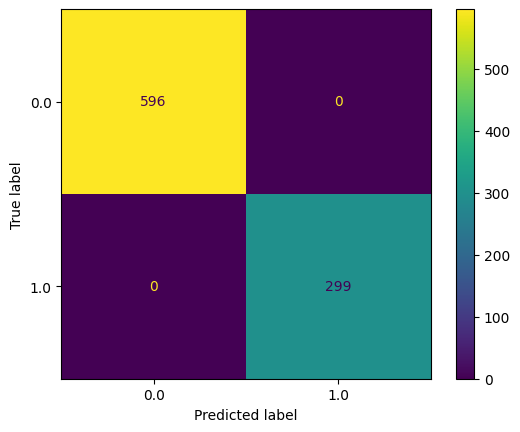

In [59]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

Learn on a few session the test on rest

In [107]:
participant_id = '00'

skip_folder = 6

In [108]:
X_train = torch.tensor([])
y_train = torch.tensor([])

for i ,folder in enumerate(sorted(os.listdir(f'../tensors/{participant_id}'))):
    if folder != skip_folder:
        folder_path = f'../tensors/{participant_id}/{folder}'

        X_loaded = torch.load(f'{folder_path}/X.pt')
        y_loaded = torch.load(f'{folder_path}/y.pt')



        X_train = torch.cat( [X_train, X_loaded], dim=0) if X_train.numel() > 0 else X_loaded
        y_train = torch.cat( [y_train, y_loaded], dim=0) if y_train.numel() > 0 else y_loaded


X_test = torch.load(f'../tensors/{participant_id}/{skip_folder}/X.pt')
y_test = torch.load(f'../tensors/{participant_id}/{skip_folder}/y.pt')



In [109]:
print(f'train shape X: {X_train.shape} y: {y_train.shape}')
print(f'test shape X: {X_test.shape} y: {y_test.shape}')


train shape X: torch.Size([29031, 900]) y: torch.Size([29031])
test shape X: torch.Size([3090, 900]) y: torch.Size([3090])


#### WHOOP WHOOP we got data loaded for one person 
lets train on everthing other than the excled dir and see how we do

In [110]:
r_f = RandomForestClassifier(max_depth=10, max_features=900)

In [111]:
r_f.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=900)

In [112]:
y_pred = r_f.predict(X_test)

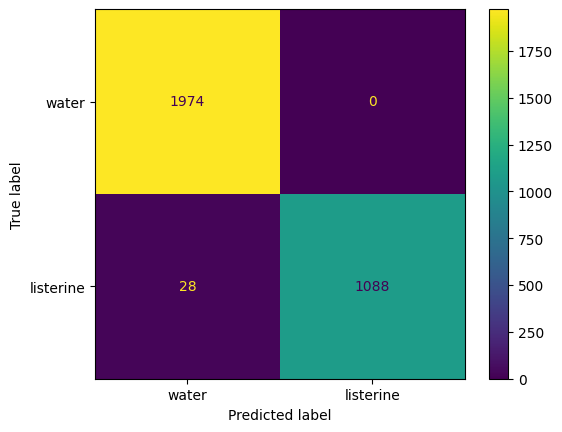

In [113]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred, display_labels=['water','listerine'])
#plt.savefig(fname=f'excluding_recording{skip_folder}')
plt.show()


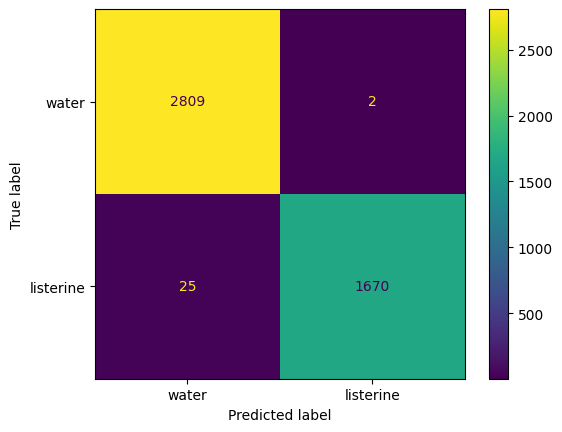

In [106]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred, display_labels=['water','listerine'])
#plt.savefig(fname=f'excluding_recording{skip_folder}')
plt.show()
#skip 3